In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [3]:
pd.read_csv("../data/heightWeight.csv")

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192
5,58,125
6,72,195
7,73,205
8,58,115
9,74,210


In [2]:
data = pd.read_csv("./data/weight-height.csv")

In [3]:
titanic = pd.read_csv("../data/titanic.csv.gz")

In [4]:
ages = titanic['Age'].dropna()
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ages_mean = titanic['Age'].mean()
ages_median = titanic['Age'].median()
ages_std = np.std(titanic['Age'])

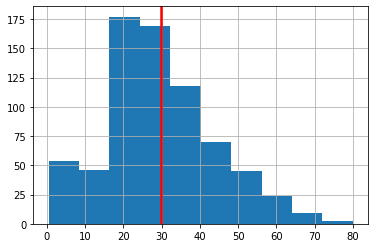

In [7]:
titanic.Age.hist()
plt.axvline(x=np.mean(ages_mean), linewidth=2.5, c='red')

## Central Limit Theorem
>Worked Example with Dice
We can make the central limit theorem concrete with a worked example involving the rolling of die.

>Remember that a die is a cube with a different number on each side from 1-to-6. Each number has a 1-in-6 likelihood to turn up from a roll. The distribution of the numbers that turn up from a dice roll is uniform given the equal likelihood.

In [8]:
print('Ages Mean:\t\t' , ages_mean, '\nAges Median:\t\t', ages_median, '\nStandard Deviation:\t', ages_std)

Ages Mean:		 29.69911764705882 
Ages Median:		 28.0 
Standard Deviation:	 14.516321150817316


## Sampling distribution 
>
The variability of a sampling distribution is measured by its variance or its standard deviation. The variability of a sampling distribution depends on three factors:

>>N: The number of observations in the population.

>>n The number of observations in the sample.

>>The way that the random sample is chosen.

>If the population size is much larger than the sample size, then the sampling distribution has roughly the same standard error, whether we sample with or without replacement. On the other hand, if the sample represents a significant fraction (say, 1/20) of the population size, the standard error will be meaningfully smaller, when we sample without replacement.

In [9]:
sample_size = 90 # roughly 10% of the population
sample = ages.sample(n=sample_size, replace=True, random_state=10 )
sample_mean = sample.mean()

In [10]:
sample_mean

32.977777777777774

In [12]:
percent_error = lambda population_mean, sample_mean: np.abs(population_mean - sample_mean)/100
p=percent_error(ages_mean, sample_mean)
print(f"Population Mean: {round(ages_mean, 3)} Sample Mean {round(sample_mean,3)} Error Percentage {p*100:.2f}%")

Population Mean: 29.699 Sample Mean 32.978 Error Percentage 3.28%


In [13]:
sample_means = []
for x in range(10**3):
    sample = ages.sample(sample_size, replace=True)
    #sample = np.random.choice(a=titanic['Age'], replace=True)
    sample_means.append(sample.mean())

In [14]:
print(f"Population Mean: {round(ages_mean, 3)} Sample Mean {round(sample_mean,3)} Error Percentage {p*100:.2f}%")

Population Mean: 29.699 Sample Mean 32.978 Error Percentage 3.28%


## Compare Population Mean to our Sampling Distribution¶


Text(0.5, 1.0, 'Sampling Distribution Mean')

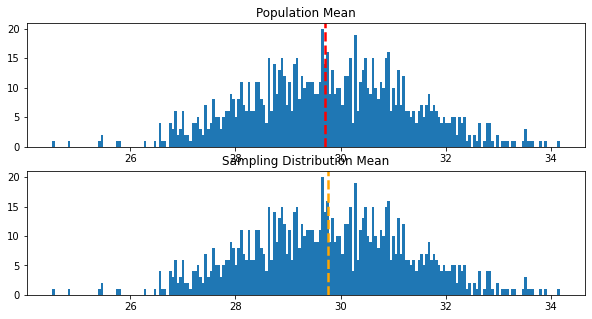

In [15]:
fig = plt.figure(figsize=[10,5])

ax1=fig.add_subplot(211)
ax1.set_title('Population Mean')
ax1.hist(sample_means, bins=200);
ax1.axvline(x=ages_mean, linestyle='--', linewidth=2.5, c='red')

ax2=fig.add_subplot(212)
ax2.hist(sample_means, bins=200);
ax2.axvline(x=np.mean(sample_means), linestyle='--', linewidth=2.5, c='orange')
ax2.set_title('Sampling Distribution Mean')

In [16]:
print(f'Population Mean: {ages.mean():.4f}, Sample Mean: {np.mean(sample_means):.4f}')

Population Mean: 29.6991, Sample Mean: 29.7523


In [17]:
sample_standard_error = ages_std/np.sqrt(sample_size)

In [18]:
sample_standard_error

1.5301546027686446

## Sampling from Finite Populations
>finite population correction (fpc) factor
>>The Central Limit Theorem and the standard errors of the mean and of the proportion are based on samples selected with replacement.
This does not present much of a problem when the sample size (n) is small relative to the population size (N); that is, when the sample is less than 5% of the population. However, In most actual surveys research, you sample without replacement from populations that are of a finite size, N. In these cases, particularly when the sample size, n, is more than 5% of the population size, N (i.e.n/N > 0.05 ), you use a finite population correction (fpc).

>>fpc = sqrt [ (N - n) / (N - 1) ]

## How to Calculate Z-Scores in Python

>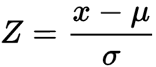

>x is a score\
>σ is the population standard deviation\
>μ is the population mean

In [ ]:
def z_score(value, mean, std):
    return (value - mean) / std

In [21]:
z_scores=(ages-ages_mean)/ages_std
titanic['z_scores']=(ages-ages_mean)/ages_std

In [35]:
titanic['z_scores'] = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std() #std(ddof=0)

In [36]:
z_scores

0     -0.530377
1      0.571831
2     -0.254825
3      0.365167
4      0.365167
         ...   
885    0.640719
886   -0.185937
887   -0.737041
889   -0.254825
890    0.158503
Name: Age, Length: 714, dtype: float64

In [23]:
x=titanic[:5]

In [24]:
for x in x.itertuples(index=False):
    print(x.PassengerId)

1
2
3
4
5


In [26]:
postive_1st_sd = len(titanic[titanic['z_scores'].between(0, 1)==True])
postive_2st_sd = len(titanic[titanic['z_scores'].between(0, 2)==True])
postive_3st_sd = len(titanic[titanic['z_scores'].between(0, 3)==True])

negative_1st_sd = len(titanic[titanic['z_scores'].between(0, -1)==True])
negative_2st_sd = len(titanic[titanic['z_scores'].between(0, -2)==True])
negative_3st_sd = len(titanic[titanic['z_scores'].between(0, -3)==True])

first_sd = len(titanic[titanic['z_scores'].between(-1, 1)==True])
second_sd = len(titanic[titanic['z_scores'].between(-2, 3)==True])
third_sd = len(titanic[titanic['z_scores'].between(-3, 3)==True])


first_sd_p  = first_sd/len(titanic)*100
second_sd_p  = second_sd/len(titanic)*100
third_sd_p  = third_sd/len(titanic)*100

In [30]:
len(titanic[titanic['z_scores'].between(0,1)])

215

In [32]:
first_sd

516